In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

from packages import general, bh, fmm

# Against N

In [3]:
particle_nums = np.logspace(1, 3, 10, dtype=int)

theta = 0.5
n_crit = 2

terms = 4

dir_times, bh_times, fmm_times = [], [], []
dir_done, bh_done, fmm_done = False, False, False

for particle_num in particle_nums:
    print(f'Number: {particle_num}')
    particles = [general.Particle(mass_like=True) for _ in range(particle_num)]

    if not dir_done:
        dir_time = %timeit -o general.pairwise.potentials(particles, zero_potentials=True)
        dir_times.append(dir_time)
        if dir_time.average > 10:
            dir_done = True

    if not bh_done:
        bh_method = bh.BH(particles, theta, terms, n_crit)
        bh_time = %timeit -o bh_method.do_bh(zero_potentials=True)
        bh_times.append(bh_time)
        if bh_time.average > 10:
            bh_done = True

    if not fmm_done:
        fmm_method = fmm.FMM(particles, terms)
        fmm_time = %timeit -o fmm_method.do_fmm(zero_expansions=True, zero_potentials=True)
        fmm_times.append(fmm_time)
        if fmm_time.average > 10:
            fmm_done = True

Number: 10
19.1 µs ± 419 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
712 µs ± 18.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
623 µs ± 9.21 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Number: 16
47.4 µs ± 656 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.63 ms ± 15.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
5.16 ms ± 93.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Number: 27
142 µs ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
3.69 ms ± 261 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.11 ms ± 191 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Number: 46
387 µs ± 168 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
7.9 ms ± 197 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.19 ms ± 378 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Number: 77
1.09 ms ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1

In [4]:
dir_avgs = [time.average for time in dir_times]
dir_stdvs = [time.stdev for time in dir_times]
bh_avgs = [time.average for time in bh_times]
bh_stdvs = [time.stdev for time in bh_times]
fmm_avgs = [time.average for time in fmm_times]
fmm_stdvs = [time.stdev for time in fmm_times]

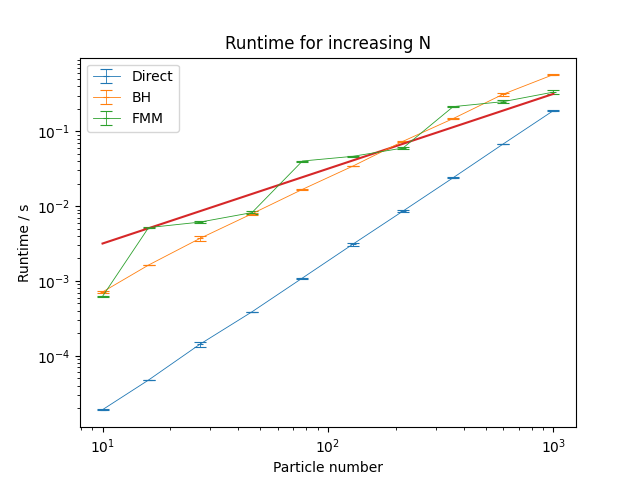

In [5]:
fig, ax = plt.subplots()

ax.errorbar(particle_nums[:len(dir_avgs)], dir_avgs, dir_stdvs, fmt='_-', 
            markersize=4, capsize=4, markeredgewidth=.8, linewidth=.6,
            label='Direct')
ax.errorbar(particle_nums[:len(bh_avgs)],  bh_avgs,  bh_stdvs,  fmt='_-', 
            markersize=4, capsize=4, markeredgewidth=.8, linewidth=.6,
            label='BH')
ax.errorbar(particle_nums[:len(fmm_avgs)], fmm_avgs, fmm_stdvs, fmt='_-', 
            markersize=4, capsize=4, markeredgewidth=.8, linewidth=.6,
            label='FMM')

ax.plot(particle_nums[:len(fmm_avgs)], particle_nums[:len(fmm_avgs)]*10**-3.5)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Particle number")
ax.set_ylabel("Runtime / s")
ax.set_title("Runtime for increasing N")
ax.legend()

plt.show()

# Against $\theta$ (BH)

In [12]:
particle_num = 1000
particles = [general.Particle(mass_like=True) for _ in range(particle_num)]

thetas = np.linspace(0, 0.6, 5)
n_crit = 2

bh_times_theta = []
bh_done = False

for theta in thetas:
    print(f'Theta: {theta}')
    if not bh_done:
        bh_method = bh.BH(particles, theta, n_crit)
        bh_time = %timeit -o bh_method.do_bh(zero_potentials=True)
        bh_times_theta.append(bh_time)
        if bh_time.average > 10:
            bh_done = True

Theta: 0.0
1.3 s ± 49.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Theta: 0.15
474 ms ± 18.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Theta: 0.3
246 ms ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Theta: 0.44999999999999996
171 ms ± 18.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Theta: 0.6
130 ms ± 9.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
bh_avgs_theta = [time.average for time in bh_times_theta]
bh_stdvs_theta = [time.stdev for time in bh_times_theta]

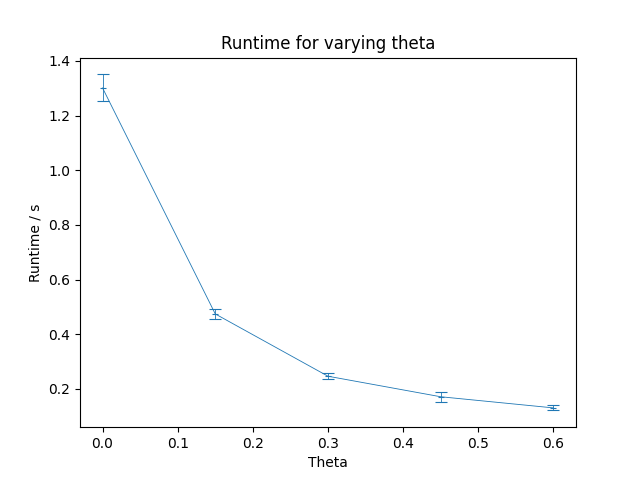

In [25]:
fig, ax = plt.subplots()

ax.errorbar(thetas[:len(bh_avgs_theta)],  bh_avgs_theta,  bh_stdvs_theta,  fmt='_-', 
            markersize=4, capsize=4, markeredgewidth=.8, linewidth=.6,
            label='Theta')

ax.set_xlabel("Theta")
ax.set_ylabel("Runtime / s")
ax.set_title("Runtime for varying theta")

plt.show()

# Against $n_{crit}$ (BH)

In [28]:
particle_num = 1000
particles = [general.Particle(mass_like=True) for _ in range(particle_num)]

theta = 0.5
n_crits = np.arange(2, 12, 2, dtype=int)

bh_times_crit = []
bh_done = False

for n_crit in n_crits:
    print(f'n_crit: {n_crit}')
    if not bh_done:
        bh_method = bh.BH(particles, theta, n_crit)
        bh_time = %timeit -o bh_method.do_bh(zero_potentials=True)
        bh_times_crit.append(bh_time)
        if bh_time.average > 10:
            bh_done = True

n_crit: 2
147 ms ± 3.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
n_crit: 4
128 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
n_crit: 6
120 ms ± 1.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
n_crit: 8
117 ms ± 1.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
n_crit: 10
117 ms ± 1.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
bh_avgs_crit = [time.average for time in bh_times_crit]
bh_stdvs_crit = [time.stdev for time in bh_times_crit]

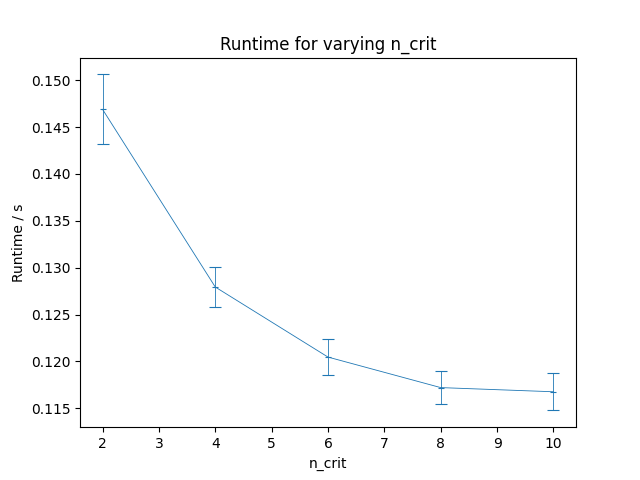

In [30]:
fig, ax = plt.subplots()

ax.errorbar(n_crits[:len(bh_avgs_crit)],  bh_avgs_crit,  bh_stdvs_crit,  fmt='_-', 
            markersize=4, capsize=4, markeredgewidth=.8, linewidth=.6,
            label='n_crit')

ax.set_xlabel("n_crit")
ax.set_ylabel("Runtime / s")
ax.set_title("Runtime for varying n_crit")

plt.show()

# Against `precision` (FMM)

In [34]:
particle_num = 1000
particles = [general.Particle(mass_like=True) for _ in range(particle_num)]

precisions = np.arange(2, 21, 4, dtype=int)

fmm_times_precision = []
fmm_done = False

for precision in precisions:
    print(f'Precision: {precision}')
    if not fmm_done:
        fmm_method = fmm.FMM(particles, precision)
        fmm_time = %timeit -o fmm_method.do_fmm(zero_expansions=True, zero_potentials=True)
        fmm_times_precision.append(fmm_time)
        if fmm_time.average > 10:
            fmm_done = True

Precision: 2
330 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Precision: 6
349 ms ± 18.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Precision: 10
385 ms ± 691 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Precision: 14
459 ms ± 18.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Precision: 18
549 ms ± 19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
fmm_avgs_precision = [time.average for time in fmm_times_precision]
fmm_stdvs_precsion = [time.stdev for time in fmm_times_precision]

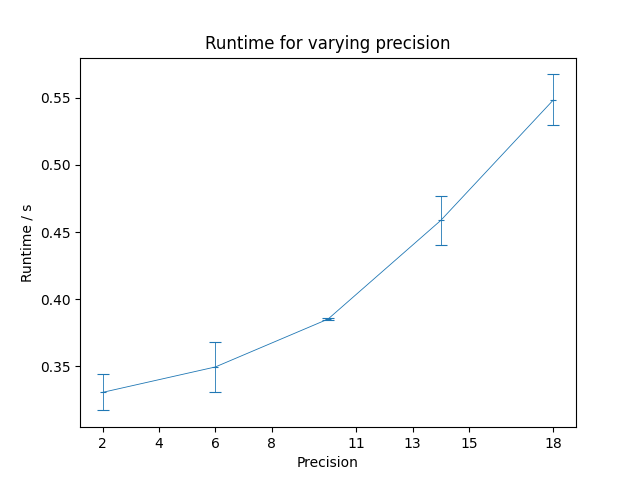

In [36]:
fig, ax = plt.subplots()

ax.errorbar(precisions[:len(fmm_avgs_precision)], fmm_avgs_precision, fmm_stdvs_precsion, fmt='_-', 
            markersize=4, capsize=4, markeredgewidth=.8, linewidth=.6,
            label='FMM')

integer_ticks = np.linspace(precisions[0], precisions[-1], 8, endpoint=True, dtype=int)
ax.set_xticks(integer_ticks)

ax.set_xlabel("Precision")
ax.set_ylabel("Runtime / s")
ax.set_title("Runtime for varying precision")

plt.show()